<a id="Introduction"></a>
### Project Notebook

This is a predictive model for the Cost Per Sale of a television advertisement.

<a id="EDA-work"></a>
### EDA

First working through the initial exploratory data analysis for my dataset using television advertising campaign and sales information.

In [2]:
#Importing everything I think I might need!

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from pathlib import Path

plt.style.use('fivethirtyeight')

%matplotlib inline

In [3]:
tv = pd.read_csv('/Users/hannah.toohey/Desktop/GA COURSE MATERIALS/FINAL PROJECT/MS_2017_fulldataset.csv')

In [4]:
tv.head()

,ACCESS_CODE,STATION_CODE,LENGTH,PROGRAM,AFFILIATE,MARKET,AIR_TYPE,DATE_AIRED,TIME_AIRED,SPOTS_RAN,...,EFF_DATE3,EFF_DATE4,T65_ED1,T65_ED2,EINQ_BD_SA,EINQ_SALE,EINQ_PD_BD,EINQ_PD_SL,AGE_THRESHOLD_CRPER,EINQ
0,CAR2,ACHW,120,N/A,NWK,Network,Network,11/20/17,01:37P,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,21.0
1,CAR2,ACHW,120,N/A,NWK,Network,Network,11/21/17,01:39P,1,...,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.05,29.0
2,CAR2,AVIE,120,N/A,NWK,Network,Network,7/26/17,11:51A,1,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.00,40.0
3,CAR2,AVIE,120,N/A,NWK,Network,Network,8/1/17,11:54A,1,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.00,27.0
4,CAR2,AVIE,120,N/A,NWK,Network,Network,8/7/17,11:50A,1,...,0.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,0.17,19.0


In [5]:
tv.columns

Index(['ACCESS_CODE', 'STATION_CODE', 'LENGTH', 'PROGRAM', 'AFFILIATE',
       'MARKET', 'AIR_TYPE', 'DATE_AIRED', 'TIME_AIRED', 'SPOTS_RAN',
       'CG_SPEND', 'TOT_CALL', 'CPC', 'LEADS', 'AGNT_OFFLD', 'CPL', 'MSLTCPER',
       'AGE_THRESHOLD', 'THRESHOLD_PER', 'TOT_SALES', 'CPS', 'CR',
       'TOT_P_SALE', 'CPPS', '$_SPENT', '6411LEADS', '6511LEADS', '6669LEAD',
       '70LEAD', 'TOT_TRAN', 'EFF_DATE1', 'EFF_DATE2', 'EFF_DATE3',
       'EFF_DATE4', 'T65_ED1', 'T65_ED2', 'EINQ_BD_SA', 'EINQ_SALE',
       'EINQ_PD_BD', 'EINQ_PD_SL', 'AGE_THRESHOLD_CRPER', 'EINQ'],
      dtype='object')

Dropping columns that are not helpful or are redundant (eg CG_SPEND and $_SPENT)

In [6]:
tv.drop(['$_SPENT','EFF_DATE1','EFF_DATE2','EFF_DATE3','EFF_DATE4','T65_ED1','T65_ED2','EINQ_BD_SA','EINQ_SALE','EINQ_PD_BD','EINQ_PD_SL'], axis=1, inplace=True)

In [7]:
tv.shape

(53943, 31)

In [8]:
tv.dtypes

ACCESS_CODE             object
STATION_CODE            object
LENGTH                   int64
PROGRAM                 object
AFFILIATE               object
MARKET                  object
AIR_TYPE                object
DATE_AIRED              object
TIME_AIRED              object
SPOTS_RAN                int64
CG_SPEND               float64
TOT_CALL               float64
CPC                    float64
LEADS                  float64
AGNT_OFFLD             float64
CPL                    float64
MSLTCPER               float64
AGE_THRESHOLD          float64
THRESHOLD_PER          float64
TOT_SALES              float64
CPS                    float64
CR                     float64
TOT_P_SALE             float64
CPPS                   float64
6411LEADS              float64
6511LEADS              float64
6669LEAD               float64
70LEAD                 float64
TOT_TRAN               float64
AGE_THRESHOLD_CRPER    float64
EINQ                   float64
dtype: object

Some columns have values that need to be trimmed, and a few that need to be a different data type - length should be an object not float or int, and Date Aired needs to be a datetime

In [9]:
tv['LENGTH'] = tv['LENGTH'].astype(object)

In [10]:
tv['DATE_AIRED'] = pd.to_datetime(tv['DATE_AIRED'])

In [11]:
tv.replace('^\s+', '', regex=True, inplace=True) #trim front
tv.replace('\s+$', '', regex=True, inplace=True) #trim end

In [12]:
tv.loc[:,:].isnull().sum()

ACCESS_CODE            0
STATION_CODE           0
LENGTH                 0
PROGRAM                0
AFFILIATE              0
MARKET                 0
AIR_TYPE               0
DATE_AIRED             0
TIME_AIRED             0
SPOTS_RAN              0
CG_SPEND               0
TOT_CALL               0
CPC                    0
LEADS                  0
AGNT_OFFLD             0
CPL                    0
MSLTCPER               0
AGE_THRESHOLD          0
THRESHOLD_PER          0
TOT_SALES              0
CPS                    0
CR                     0
TOT_P_SALE             0
CPPS                   0
6411LEADS              0
6511LEADS              0
6669LEAD               0
70LEAD                 0
TOT_TRAN               0
AGE_THRESHOLD_CRPER    0
EINQ                   0
dtype: int64

No missing values!

In [13]:
tv.loc[:,'AIR_TYPE'].value_counts()

Spot              20363
Cable             20344
Other              7294
Local Cable        3316
Network            1346
Satellite           760
Syndication         519
Regional Cable        1
Name: AIR_TYPE, dtype: int64

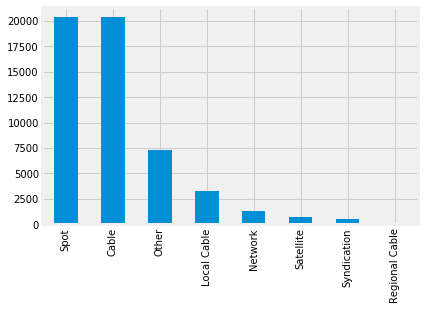

In [14]:
tv.loc[:,'AIR_TYPE'].value_counts().plot(kind='bar');

In [15]:
tv.describe()

,LENGTH,SPOTS_RAN,CG_SPEND,TOT_CALL,CPC,LEADS,AGNT_OFFLD,CPL,MSLTCPER,AGE_THRESHOLD,...,CR,TOT_P_SALE,CPPS,6411LEADS,6511LEADS,6669LEAD,70LEAD,TOT_TRAN,AGE_THRESHOLD_CRPER,EINQ
count,53943.000000,53943.0,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,...,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,95.832267,1.0,1180.750797,8.289936,103.968754,4.850509,0.017407,144.476363,0.357558,1.085368,...,0.019420,0.143262,306.814390,1.616336,0.339785,0.930297,1.964648,1.014348,0.013126,0.948279
std,29.427890,0.0,3577.088990,28.493220,154.295154,16.292625,0.391141,239.903867,0.410772,3.627552,...,0.098542,0.629960,1667.955182,5.418953,1.237290,3.212581,7.140932,3.837517,0.094201,3.145012
min,60.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,1.0,41.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,1.0,207.750000,1.000000,62.960000,1.000000,0.000000,23.080000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,1.0,1015.670000,6.000000,153.890000,4.000000,0.000000,221.600000,0.670000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,120.000000,1.0,50960.980000,1007.000000,5431.410000,435.000000,36.000000,5717.320000,2.000000,80.000000,...,2.000000,23.000000,50960.980000,117.000000,28.000000,84.000000,211.000000,155.000000,3.000000,66.000000


In [16]:
tv.loc[:,'CG_SPEND'].sum()

63693240.23000899

In [17]:
tv.loc[:,'CPS'].mean()

315.67796247889993

In [18]:
tv.loc[:,'CPS'].median()

0.0

In [19]:
tv.loc[:,'CPS'].mode()

0    0.0
dtype: float64

In [20]:
y = tv.loc[:,'CPS']
y

0        37571.63
1         9392.91
2        13192.68
3         8795.12
4         4397.56
5         7371.95
6         2835.36
7         9214.93
8        12286.58
9        36859.73
10        9214.93
11       12286.58
12        6555.71
13        8740.95
14       28642.01
15       28642.01
16        4773.67
17        4454.53
18        4610.13
19        4899.98
20        4454.53
21       10372.80
22        5444.42
23       16333.27
24        4899.98
25        6915.20
26        3457.60
27       24499.90
28        6915.20
29           0.00
           ...   
53913        0.00
53914        0.00
53915        0.00
53916        0.00
53917        0.00
53918        0.00
53919        0.00
53920        0.00
53921        0.00
53922        0.00
53923        0.00
53924        0.00
53925        0.00
53926        0.00
53927        0.00
53928        0.00
53929        0.00
53930        0.00
53931        0.00
53932        0.00
53933        0.00
53934        0.00
53935        0.00
53936        0.00
53937     

In [21]:
y_pred = y.mean()
y_pred

315.67796247889993

In [22]:
mse = ((y - y_pred)**2).mean()
mse

2466658.834650417

In [23]:
tv.corr()

,LENGTH,SPOTS_RAN,CG_SPEND,TOT_CALL,CPC,LEADS,AGNT_OFFLD,CPL,MSLTCPER,AGE_THRESHOLD,...,CR,TOT_P_SALE,CPPS,6411LEADS,6511LEADS,6669LEAD,70LEAD,TOT_TRAN,AGE_THRESHOLD_CRPER,EINQ
LENGTH,1.000000,NaN,0.060259,0.074075,-0.089606,0.075286,-0.012927,-0.071003,-0.028724,0.068633,...,-0.018955,0.043248,0.050464,0.070642,0.066805,0.070764,0.074801,0.062739,-0.001350,0.067617
SPOTS_RAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CG_SPEND,0.060259,NaN,1.000000,0.897722,0.180769,0.906600,0.131445,0.228677,0.178598,0.831993,...,0.044114,0.651090,0.700231,0.871018,0.798021,0.864324,0.880521,0.856961,0.070024,0.856285
TOT_CALL,0.074075,NaN,0.897722,1.000000,0.062935,0.976373,0.134518,0.114822,0.159792,0.893483,...,0.047774,0.719961,0.607091,0.942694,0.863852,0.933797,0.942594,0.939099,0.072628,0.907228
CPC,-0.089606,NaN,0.180769,0.062935,1.000000,0.072612,0.010074,0.658502,0.403551,0.076116,...,0.069017,0.049213,0.078261,0.072813,0.066101,0.069126,0.067911,0.059785,0.047012,0.080377
LEADS,0.075286,NaN,0.906600,0.976373,0.072612,1.000000,0.123344,0.105612,0.206900,0.919413,...,0.048560,0.731777,0.622658,0.958205,0.883136,0.956002,0.971370,0.929562,0.074049,0.936529
AGNT_OFFLD,-0.012927,NaN,0.131445,0.134518,0.010074,0.123344,1.000000,0.016958,0.008421,0.109657,...,0.009728,0.086633,0.094446,0.126238,0.128745,0.123343,0.107823,0.088104,0.010005,0.067252
CPL,-0.071003,NaN,0.228677,0.114822,0.658502,0.105612,0.016958,1.000000,0.347134,0.111338,...,0.101628,0.074782,0.104799,0.110683,0.098432,0.100958,0.094720,0.100708,0.067377,0.111468
MSLTCPER,-0.028724,NaN,0.178598,0.159792,0.403551,0.206900,0.008421,0.347134,1.000000,0.205526,...,0.151698,0.156252,0.117981,0.199953,0.188800,0.202650,0.196443,0.161235,0.100999,0.213442
AGE_THRESHOLD,0.068633,NaN,0.831993,0.893483,0.076116,0.919413,0.109657,0.111338,0.205526,1.000000,...,0.055849,0.704819,0.565500,0.965309,0.852573,0.856735,0.832068,0.821311,0.087457,0.883421


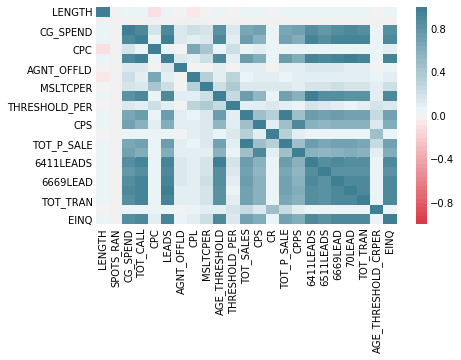

In [24]:
sns.heatmap(tv.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(10, 220, n=50))

A lot of these features appear to be correlated, so it will be important to check out which have collinearity issues before further analysis, such as sales and paid sales.

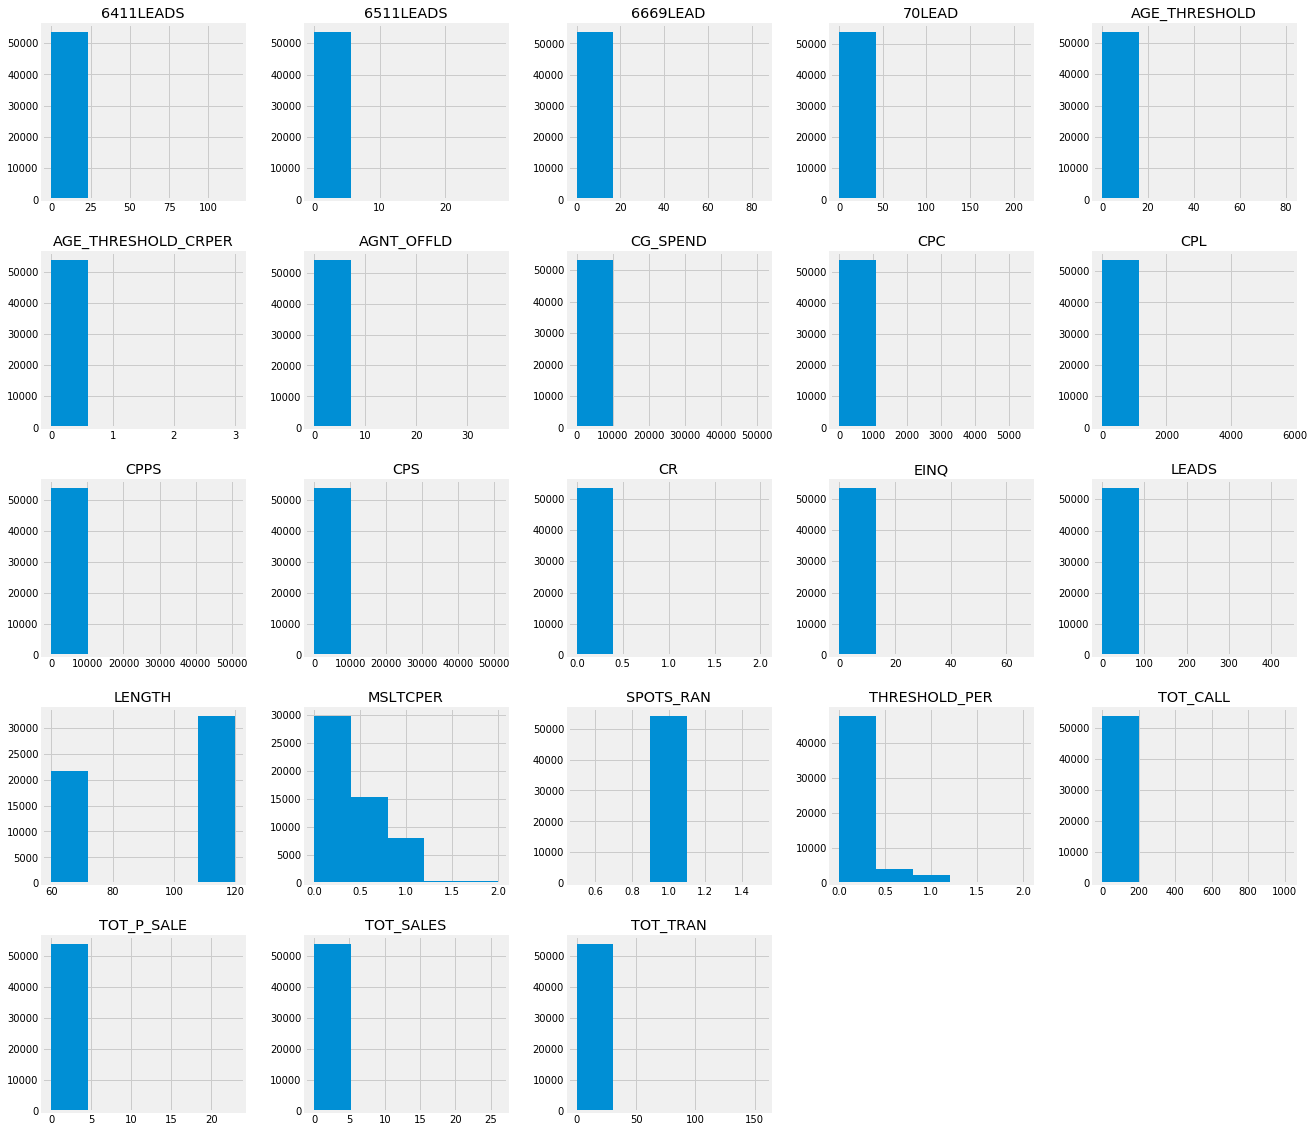

In [25]:
tv.hist(figsize=(20, 20), bins=5);

Need to convert the separate age band columns into one column that finds the age using idmax

In [26]:
ages = tv.loc[:,['6411LEADS','6511LEADS','6669LEAD','70LEAD']]
ages

,6411LEADS,6511LEADS,6669LEAD,70LEAD
0,26.0,13.0,13.0,35.0
1,44.0,7.0,20.0,56.0
2,42.0,10.0,28.0,72.0
3,42.0,11.0,23.0,50.0
4,23.0,10.0,24.0,43.0
5,38.0,9.0,29.0,79.0
6,48.0,17.0,45.0,117.0
7,29.0,8.0,25.0,84.0
8,30.0,7.0,32.0,61.0
9,8.0,2.0,4.0,15.0


In [27]:
agebands = ages.idxmax(axis=1)
agebands

0           70LEAD
1           70LEAD
2           70LEAD
3           70LEAD
4           70LEAD
5           70LEAD
6           70LEAD
7           70LEAD
8           70LEAD
9           70LEAD
10          70LEAD
11          70LEAD
12          70LEAD
13          70LEAD
14          70LEAD
15          70LEAD
16          70LEAD
17          70LEAD
18          70LEAD
19          70LEAD
20          70LEAD
21          70LEAD
22       6411LEADS
23          70LEAD
24          70LEAD
25          70LEAD
26          70LEAD
27          70LEAD
28          70LEAD
29          70LEAD
           ...    
53913    6411LEADS
53914    6411LEADS
53915     6669LEAD
53916    6411LEADS
53917    6411LEADS
53918    6411LEADS
53919    6411LEADS
53920    6411LEADS
53921    6411LEADS
53922    6411LEADS
53923    6411LEADS
53924    6411LEADS
53925    6411LEADS
53926    6411LEADS
53927    6411LEADS
53928    6411LEADS
53929       70LEAD
53930    6411LEADS
53931    6411LEADS
53932     6669LEAD
53933    6411LEADS
53934    641

In [28]:
tv['AGEBAND']=agebands

In [29]:
tv.loc[:, 'AGEBAND'] = tv.loc[:, 'AGEBAND'].map({'6411LEADS': 64, '6511LEADS': 65, '6669LEAD':66,'70LEAD':70})

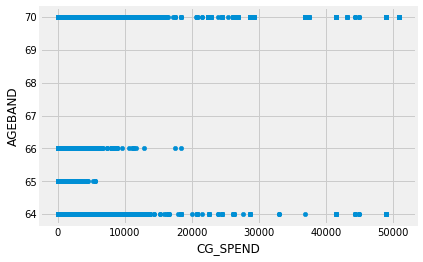

In [30]:
tv.plot(kind='scatter', x='CG_SPEND',y='AGEBAND')

In [31]:
tv.drop(['6411LEADS','6511LEADS','6669LEAD','70LEAD'], axis=1, inplace=True)

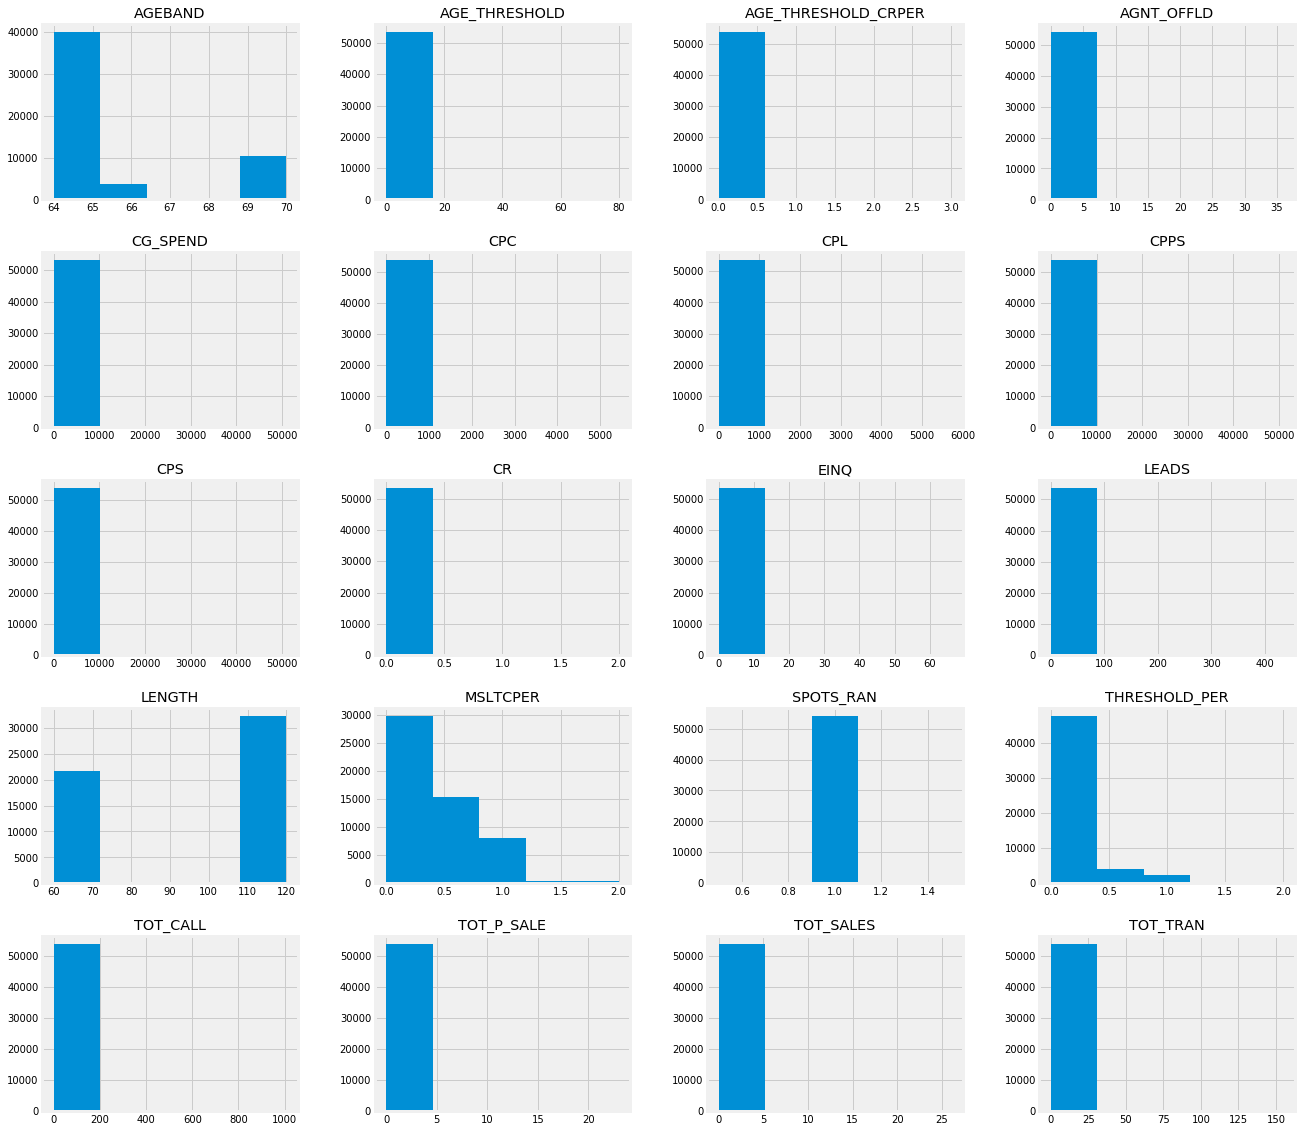

In [32]:
tv.hist(figsize=(20, 20), bins=5);

We will need to create lots of dummy variables for this model to work.

<a id="its-dummy-time"></a>
## Setting Dummy Variables
---

- This dataset has quite a few CATEGORICAL features, so we must set dummy variables for most. The process will be to review the columns, value counts, check for N/A if it is better to drop the column, then assign dummies, drop one of the dummy variables to eliminate collinearity

In [33]:
tv.columns

Index(['ACCESS_CODE', 'STATION_CODE', 'LENGTH', 'PROGRAM', 'AFFILIATE',
       'MARKET', 'AIR_TYPE', 'DATE_AIRED', 'TIME_AIRED', 'SPOTS_RAN',
       'CG_SPEND', 'TOT_CALL', 'CPC', 'LEADS', 'AGNT_OFFLD', 'CPL', 'MSLTCPER',
       'AGE_THRESHOLD', 'THRESHOLD_PER', 'TOT_SALES', 'CPS', 'CR',
       'TOT_P_SALE', 'CPPS', 'TOT_TRAN', 'AGE_THRESHOLD_CRPER', 'EINQ',
       'AGEBAND'],
      dtype='object')

In [34]:
tv.loc[:,'ACCESS_CODE'].value_counts()

TKM2    10330
SA60     8253
ST12     6902
GBR2     5937
TKM6     5578
WMN2     4586
ST60     2030
N656     1826
N652     1812
WMN6     1534
JTR2     1406
GBR6     1345
CAR2     1242
JTR6      756
SD60      226
CAR6      102
JPC6       69
JPL6        9
Name: ACCESS_CODE, dtype: int64

In [35]:
access_code_dummies = pd.get_dummies(tv.loc[:,'ACCESS_CODE'])
access_code_dummies.drop('JPL6', axis=1, inplace=True)
access_code_dummies

,CAR2,CAR6,GBR2,GBR6,JPC6,JTR2,JTR6,N652,N656,SA60,SD60,ST12,ST60,TKM2,TKM6,WMN2,WMN6
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
tv.loc[:,'STATION_CODE'].value_counts()

WGCB     2250
HMCL     1882
INSP     1876
TVLC     1438
WJLP     1298
WFMZ     1297
HPIX     1288
KRCR     1261
CLTV     1237
CNN      1174
WLNY     1145
GRIT     1074
HMAQ     1071
TWC      1032
KJWP     1003
HMC       997
OVTN      870
GETTV     863
LAFF      846
TBD       822
MSNBC     820
EBAL      815
UNHD      786
FOXNC     761
MOVI      746
WGNA      662
WABC      607
NNY1      596
WGNAL     595
OANN      579
         ... 
MARIE       7
HTBN        7
ABCAD       6
BUTM        6
JTST        6
LM19        5
LITV        5
DC30        5
DCM4        4
OTMN        4
OUTA        4
LOCI        3
SFTH        2
LM20        2
DC33        2
DC18        2
JFTH        1
DC16        1
DCM1        1
XPCO        1
NGWD        1
LMS5        1
DC12        1
ATTN        1
BBAB        1
DC11        1
LM12        1
DC21        1
ELLN        1
CSIM        1
Name: STATION_CODE, Length: 232, dtype: int64

In [37]:
station_code_dummies = pd.get_dummies(tv.loc[:,'STATION_CODE'])
station_code_dummies.drop('700C', axis=1, inplace=True)
station_code_dummies

,ABCAD,ABVD,ACHW,AEN,AGDA,AMC,ANT,ATGN,ATTN,AVIE,...,WTVH,WUSA,WWJ,WXLV,WXYZ,WYOU,WZVN,XPCO,XPCO2,ZETV
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
pd.set_option('display.max_columns', None)

In [39]:
tv.loc[:,'LENGTH'].value_counts()

120    32215
60     21728
Name: LENGTH, dtype: int64

In [40]:
length_dummies = pd.get_dummies(tv.loc[:,'LENGTH'], drop_first=True)
length_dummies

,120
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [41]:
tv.loc[:,'PROGRAM'].value_counts()

N/A                               24548
MOVIE                              1965
GUNSMOKE                           1008
WEATHER CENTER LIVE                 729
MATLOCK                             586
BLUE BLOODS                         544
BONANZA                             501
THE ANDY GRIFFITH SHOW              493
JUDGE JUDY                          483
HOT BENCH                           468
HARRY                               447
WALKER, TEXAS RANGER                447
THE DOCTORS                         416
DIAGNOSIS MURDER                    373
THE PEOPLE'S COURT                  349
DR. PHIL                            340
EYEWITNESS NEWS AT NOON             337
DANIEL BOONE                        336
THE ELLEN DEGENERES SHOW            332
RACHAEL RAY                         300
M*A*S*H                             298
WHO WANTS TO BE A MILLIONAIRE       294
THE WALTONS                         283
PERRY MASON                         246
THE BIG VALLEY                      242


Due to the significant number of N/A values for program and the fact that the data in unavailable, we will drop that feature

In [42]:
tv.drop(['PROGRAM'], axis=1, inplace=True)

In [43]:
tv.columns

Index(['ACCESS_CODE', 'STATION_CODE', 'LENGTH', 'AFFILIATE', 'MARKET',
       'AIR_TYPE', 'DATE_AIRED', 'TIME_AIRED', 'SPOTS_RAN', 'CG_SPEND',
       'TOT_CALL', 'CPC', 'LEADS', 'AGNT_OFFLD', 'CPL', 'MSLTCPER',
       'AGE_THRESHOLD', 'THRESHOLD_PER', 'TOT_SALES', 'CPS', 'CR',
       'TOT_P_SALE', 'CPPS', 'TOT_TRAN', 'AGE_THRESHOLD_CRPER', 'EINQ',
       'AGEBAND'],
      dtype='object')

In [44]:
tv.loc[:,'AFFILIATE'].value_counts()

CAB     22400
NONE     7408
ABC      5376
IND      5101
METV     4130
CBS      2724
ANT      1621
COZI     1246
NWK       994
NBC       982
SAT       760
SYN       519
THIS      315
ION       233
FOX       104
CW         30
Name: AFFILIATE, dtype: int64

In this instance, NONE is not an N/A, it is a true element (the station has no Affiliate), so we will move forward creating dummies, and we will use NONE as the dummy variable that we drop (more natural).

In [45]:
affiliate_dummies = pd.get_dummies(tv.loc[:,'AFFILIATE'])
affiliate_dummies.drop('NONE', axis=1, inplace=True)
affiliate_dummies

,ABC,ANT,CAB,CBS,COZI,CW,FOX,IND,ION,METV,NBC,NWK,SAT,SYN,THIS
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [46]:
tv.loc[:,'MARKET'].value_counts()

Cable                             20270
Digital Networks                   7275
New York                           5898
Philadelphia                       3031
Chicago                            2394
Harrisburg-York-Lancaster-Leba     2250
Network                            1304
Chico-Redding                      1261
Omaha                              1208
Wilkes Barre-Scranton              1026
Lincoln-Hastings-Kearney, NE        861
Baltimore                           861
Ft. Myers-Naples, FL                781
Satellite                           744
Syndication                         519
Detroit, MI                         517
Missoula, MT                        441
St. Louis                           255
Tri-Cities, TN-VA                   254
Greensboro-Winston-Salem-High       249
Billings-Hardin                     246
Portland-Auburn, ME                 244
Helena                              238
Great Falls                         229
Columbia, SC                        163


In [47]:
market_dummies = pd.get_dummies(tv.loc[:,'MARKET'])
market_dummies.drop('Nashville, TN', axis=1, inplace=True)
market_dummies

,Albany-Schenectady-Troy,Baltimore,Billings-Hardin,Boston,Burlington VT -Plattsburgh NY,Butte-Bozeman,Cable,Charlotte,Chicago,Chico-Redding,Cleveland,"Columbia, SC","Detroit, MI",Digital Networks,"Fresno-Visalia, CA","Ft. Myers-Naples, FL",Great Falls,Greensboro-Winston-Salem-High,Harrisburg-York-Lancaster-Leba,"Hartford-New Haven, CT",Helena,"Indianapolis, IN","Jacksonville, FL","Lincoln-Hastings-Kearney, NE","Missoula, MT",Network,New York,Omaha,Philadelphia,"Portland-Auburn, ME",Providence-New Bedford,Regional Cables,"Rochester, NY",Satellite,Seattle-Tacoma,St. Louis,Syndication,Syracuse,"Tri-Cities, TN-VA",Unwired Network,Video On Demand,"Washington, DC",Wilkes Barre-Scranton
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
tv.loc[:,'AIR_TYPE'].value_counts()

Spot              20363
Cable             20344
Other              7294
Local Cable        3316
Network            1346
Satellite           760
Syndication         519
Regional Cable        1
Name: AIR_TYPE, dtype: int64

In [49]:
#To avoid confusion, we will add Air Type to the end of the column names
air_type_dummies = pd.get_dummies(tv.loc[:,'AIR_TYPE'])
air_type_dummies.columns = [str(col) + '_Air_Type' for col in air_type_dummies.columns]
air_type_dummies.drop('Other_Air_Type', axis=1, inplace=True)
air_type_dummies.head()

,Cable_Air_Type,Local Cable_Air_Type,Network_Air_Type,Regional Cable_Air_Type,Satellite_Air_Type,Spot_Air_Type,Syndication_Air_Type
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


<a id="its-dummy-time"></a>
## Create model with all new dummy variables
---

- To recap, the original tv dataframe had quite a few features that needed dummy variables
- We now need to build a model using all of these dummy variables
- Let's create a new DF with all of the dummies, tv_dummies
 -- access_code_dummies, station_code_dummies, length_dummies, (affiliate_dummies ARE BEING DROPPED becausey they overlap with station), market_dummies, air_type_dummies

In [50]:
tv_dummies = pd.concat([tv, access_code_dummies, station_code_dummies, length_dummies, 
                        market_dummies, air_type_dummies ], axis=1)

In [51]:
tv_dummies.head()

,ACCESS_CODE,STATION_CODE,LENGTH,AFFILIATE,MARKET,AIR_TYPE,DATE_AIRED,TIME_AIRED,SPOTS_RAN,CG_SPEND,TOT_CALL,CPC,LEADS,AGNT_OFFLD,CPL,MSLTCPER,AGE_THRESHOLD,THRESHOLD_PER,TOT_SALES,CPS,CR,TOT_P_SALE,CPPS,TOT_TRAN,AGE_THRESHOLD_CRPER,EINQ,AGEBAND,CAR2,CAR6,GBR2,GBR6,JPC6,JTR2,JTR6,N652,N656,SA60,SD60,ST12,ST60,TKM2,TKM6,WMN2,WMN6,ABCAD,ABVD,ACHW,AEN,AGDA,AMC,ANT,ATGN,ATTN,AVIE,AWNN,BBAB,BCWN,BLMD,BLOM,BPIR,BUTM,BUZZR,BYAR,CBSAD,CC,CHIL,CHRGE,CLOO,CLTV,CNBC,CNN,COMET,COZI,CRIV,CSIM,CTLK,DC11,DC12,DC13,DC16,DC18,DC21,DC23,DC28,DC30,DC33,DCM1,DCM4,DNAD,DNFN,DTLN,DTVD,EBAL,ECAU,EJHL,ELLN,ELREY,ENBC,ENEP,ESC,EZVN,FBN,FETV,FNWL,FOOD,FOXNC,FPCC,GETTV,GOLF,GRIT,GRSL,GSN,HALL,HERO,HGTV,HIST,HLN,HLNL,HMAQ,HMC,HMCL,HPIX,HTBN,IFC,INDC,INSP,ION,IONLO,ITNC,JFTH,JSTC,JTST,KBGF,KDNL,KECI,KETV,KFBB,KGPE,KHBB,KHGI,KJWP,KLKN,KMOV,KMTV,KOLN,KOMO,KPAX,KRCR,KRTV,KSVI,KTMF,KTVH,KTVM,KTVQ,KULR,KWYB,KXLF,KXLH,KYW,LAFF,LDA2,LDA2U,LDIN,LDTC,LDTCU,LHTM,LITV,LM12,LM19,LM20,LMS5,LOCI,MARIE,MCKT,METV,MIHI,MOVI,MSNBC,NATW,NDOL,NECI,NETTV,NETV,NGWD,NLNT,NNY1,NPTM,NSNB,NWMX,NY12,NYF1,OANN,OLYM,OTMN,OUTA,OVNL,OVTN,OXYG,PAWN,PBLM,PLAM,PURS,RFCB,SFTH,SMIT,SUND,TBD,TECN,TENC,THS,TLC,TMUW,TNT,TPLS,TRIF,TUNN,TV1,TVLC,TWC,TWNW,TWRK,TWSR,UNHD,USA,USAL,WABC,WADL,WBBH,WBTV,WBZ,WCAX,WCBS,WFMY,WFMZ,WFSB,WGCB,WGNA,WGNAL,WHAM,WINK,WJAX,WJHL,WJLP,WJXX,WJZ,WLNY,WLTX,WMAQ,WMTW,WNBC,WNEP,WNYW,WOIO,WOLO,WOWT,WPPX,WPRI,WPVI,WPXN,WPXW,WSOC,WSTM,WTEN,WTTV,WTVF,WTVH,WUSA,WWJ,WXLV,WXYZ,WYOU,WZVN,XPCO,XPCO2,ZETV,120,Albany-Schenectady-Troy,Baltimore,Billings-Hardin,Boston,Burlington VT -Plattsburgh NY,Butte-Bozeman,Cable,Charlotte,Chicago,Chico-Redding,Cleveland,"Columbia, SC","Detroit, MI",Digital Networks,"Fresno-Visalia, CA","Ft. Myers-Naples, FL",Great Falls,Greensboro-Winston-Salem-High,Harrisburg-York-Lancaster-Leba,"Hartford-New Haven, CT",Helena,"Indianapolis, IN","Jacksonville, FL","Lincoln-Hastings-Kearney, NE","Missoula, MT",Network,New York,Omaha,Philadelphia,"Portland-Auburn, ME",Providence-New Bedford,Regional Cables,"Rochester, NY",Satellite,Seattle-Tacoma,St. Louis,Syndication,Syracuse,"Tri-Cities, TN-VA",Unwired Network,Video On Demand,"Washington, DC",Wilkes Barre-Scranton,Cable_Air_Type,Local Cable_Air_Type,Network_Air_Type,Regional Cable_Air_Type,Satellite_Air_Type,Spot_Air_Type,Syndication_Air_Type
0,CAR2,ACHW,120,NWK,Network,Network,2017-11-20,01:37P,1,37571.63,143.0,262.74,87.0,0.0,431.86,0.61,18.0,0.21,1.0,37571.63,0.01,0.0,0.00,24.0,0.00,21.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,CAR2,ACHW,120,NWK,Network,Network,2017-11-21,01:39P,1,37571.63,193.0,194.67,127.0,0.0,295.84,0.66,20.0,0.16,4.0,9392.91,0.03,1.0,37571.63,38.0,0.05,29.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,CAR2,AVIE,120,NWK,Network,Network,2017-07-26,11:51A,1,26385.36,248.0,106.39,152.0,0.0,173.59,0.61,30.0,0.20,2.0,13192.68,0.01,1.0,26385.36,26.0,0.00,40.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [85]:
tv_dummies.shape

(53943, 327)

In [52]:
pd.options.display.max_seq_items = None
tv_dummies.columns

Index([                   'ACCESS_CODE',                   'STATION_CODE',
                               'LENGTH',                      'AFFILIATE',
                               'MARKET',                       'AIR_TYPE',
                           'DATE_AIRED',                     'TIME_AIRED',
                            'SPOTS_RAN',                       'CG_SPEND',
                             'TOT_CALL',                            'CPC',
                                'LEADS',                     'AGNT_OFFLD',
                                  'CPL',                       'MSLTCPER',
                        'AGE_THRESHOLD',                  'THRESHOLD_PER',
                            'TOT_SALES',                            'CPS',
                                   'CR',                     'TOT_P_SALE',
                                 'CPPS',                       'TOT_TRAN',
                  'AGE_THRESHOLD_CRPER',                           'EINQ',
                         

In [53]:
#predicting mean of entire dataset before moving forward
tv_dummies.loc[:,'prediction'] = tv_dummies.loc[:,'CPS'].mean()
tv_dummies

,ACCESS_CODE,STATION_CODE,LENGTH,AFFILIATE,MARKET,AIR_TYPE,DATE_AIRED,TIME_AIRED,SPOTS_RAN,CG_SPEND,TOT_CALL,CPC,LEADS,AGNT_OFFLD,CPL,MSLTCPER,AGE_THRESHOLD,THRESHOLD_PER,TOT_SALES,CPS,CR,TOT_P_SALE,CPPS,TOT_TRAN,AGE_THRESHOLD_CRPER,EINQ,AGEBAND,CAR2,CAR6,GBR2,GBR6,JPC6,JTR2,JTR6,N652,N656,SA60,SD60,ST12,ST60,TKM2,TKM6,WMN2,WMN6,ABCAD,ABVD,ACHW,AEN,AGDA,AMC,ANT,ATGN,ATTN,AVIE,AWNN,BBAB,BCWN,BLMD,BLOM,BPIR,BUTM,BUZZR,BYAR,CBSAD,CC,CHIL,CHRGE,CLOO,CLTV,CNBC,CNN,COMET,COZI,CRIV,CSIM,CTLK,DC11,DC12,DC13,DC16,DC18,DC21,DC23,DC28,DC30,DC33,DCM1,DCM4,DNAD,DNFN,DTLN,DTVD,EBAL,ECAU,EJHL,ELLN,ELREY,ENBC,ENEP,ESC,EZVN,FBN,FETV,FNWL,FOOD,FOXNC,FPCC,GETTV,GOLF,GRIT,GRSL,GSN,HALL,HERO,HGTV,HIST,HLN,HLNL,HMAQ,HMC,HMCL,HPIX,HTBN,IFC,INDC,INSP,ION,IONLO,ITNC,JFTH,JSTC,JTST,KBGF,KDNL,KECI,KETV,KFBB,KGPE,KHBB,KHGI,KJWP,KLKN,KMOV,KMTV,KOLN,KOMO,KPAX,KRCR,KRTV,KSVI,KTMF,KTVH,KTVM,KTVQ,KULR,KWYB,KXLF,KXLH,KYW,LAFF,LDA2,LDA2U,LDIN,LDTC,LDTCU,LHTM,LITV,LM12,LM19,LM20,LMS5,LOCI,MARIE,MCKT,METV,MIHI,MOVI,MSNBC,NATW,NDOL,NECI,NETTV,NETV,NGWD,NLNT,NNY1,NPTM,NSNB,NWMX,NY12,NYF1,OANN,OLYM,OTMN,OUTA,OVNL,OVTN,OXYG,PAWN,PBLM,PLAM,PURS,RFCB,SFTH,SMIT,SUND,TBD,TECN,TENC,THS,TLC,TMUW,TNT,TPLS,TRIF,TUNN,TV1,TVLC,TWC,TWNW,TWRK,TWSR,UNHD,USA,USAL,WABC,WADL,WBBH,WBTV,WBZ,WCAX,WCBS,WFMY,WFMZ,WFSB,WGCB,WGNA,WGNAL,WHAM,WINK,WJAX,WJHL,WJLP,WJXX,WJZ,WLNY,WLTX,WMAQ,WMTW,WNBC,WNEP,WNYW,WOIO,WOLO,WOWT,WPPX,WPRI,WPVI,WPXN,WPXW,WSOC,WSTM,WTEN,WTTV,WTVF,WTVH,WUSA,WWJ,WXLV,WXYZ,WYOU,WZVN,XPCO,XPCO2,ZETV,120,Albany-Schenectady-Troy,Baltimore,Billings-Hardin,Boston,Burlington VT -Plattsburgh NY,Butte-Bozeman,Cable,Charlotte,Chicago,Chico-Redding,Cleveland,"Columbia, SC","Detroit, MI",Digital Networks,"Fresno-Visalia, CA","Ft. Myers-Naples, FL",Great Falls,Greensboro-Winston-Salem-High,Harrisburg-York-Lancaster-Leba,"Hartford-New Haven, CT",Helena,"Indianapolis, IN","Jacksonville, FL","Lincoln-Hastings-Kearney, NE","Missoula, MT",Network,New York,Omaha,Philadelphia,"Portland-Auburn, ME",Providence-New Bedford,Regional Cables,"Rochester, NY",Satellite,Seattle-Tacoma,St. Louis,Syndication,Syracuse,"Tri-Cities, TN-VA",Unwired Network,Video On Demand,"Washington, DC",Wilkes Barre-Scranton,Cable_Air_Type,Local Cable_Air_Type,Network_Air_Type,Regional Cable_Air_Type,Satellite_Air_Type,Spot_Air_Type,Syndication_Air_Type,prediction
0,CAR2,ACHW,120,NWK,Network,Network,2017-11-20,01:37P,1,37571.63,143.0,262.74,87.0,0.0,431.86,0.61,18.0,0.21,1.0,37571.63,0.01,0.0,0.00,24.0,0.00,21.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,315.677962
1,CAR2,ACHW,120,NWK,Network,Network,2017-11-21,01:39P,1,37571.63,193.0,194.67,127.0,0.0,295.84,0.66,20.0,0.16,4.0,9392.91,0.03,1.0,37571.63,38.0,0.05,29.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,315.677962
2,CAR2,AVIE,120,NWK,Network,Network,2017-07-26,11:51A,1,26385.36,248.0,106.39,152.0,0.0,173.59,0.61,30.0,0.20,2.0,13192.68,0.01,1.0,26385.36,26.0,0.00,40.0,70

In [54]:
#Checking the mean squared error of just using the mean as the prediction
from sklearn import metrics
import numpy as np

np.sqrt(metrics.mean_squared_error(tv_dummies.loc[:,'CPS'], tv_dummies.loc[:,'prediction']))

1570.5600385381651

Since the new tv_dummies dataframe has so many (327) columns it is important to determine which features are actually important to the model. Next we will test different groups of features, and look for one with a mse lower than that of a model simply predicting the mean.

In [55]:
tv_dummies.shape

(53943, 327)

In [58]:
# Instantiate a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state =1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [59]:
from sklearn.model_selection import train_test_split

def train_test_rmse(df, feature_cols):
    X = df.loc[:, feature_cols]
    y = df.loc[:,'CPS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

    treereg = DecisionTreeRegressor()
    treereg.fit(X_train,y_train)
    
    y_pred = treereg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [60]:
#Checking the rmse for these different groupings of feature columns
#USING SPEND AND LEADS
print(train_test_rmse(tv_dummies, ['CG_SPEND','LEADS']))
#USING SPEND AND LEADS AND AGEBAND
print(train_test_rmse(tv_dummies, ['CG_SPEND','LEADS','AGEBAND']))
#ADDING AGE THRESHOLD
print(train_test_rmse(tv_dummies, ['CG_SPEND','LEADS','AGE_THRESHOLD','MSLTCPER']))
#USING AIR TYPE 
print(train_test_rmse(tv_dummies, ['CG_SPEND','LEADS','Cable_Air_Type','Local Cable_Air_Type','Network_Air_Type','Regional Cable_Air_Type','Satellite_Air_Type','Spot_Air_Type','Syndication_Air_Type']))
#USING CREATIVES
print(train_test_rmse(tv_dummies, ['CG_SPEND','LEADS','CAR2','CAR6','GBR2','GBR6','JPC6','JTR2','JTR6','N652','N656','SA60','SD60','ST12','ST60','TKM2','TKM6','WMN2','WMN6']))
#USING CREATIVE AND AIR TYPE
print(train_test_rmse(tv_dummies, ['CG_SPEND','LEADS','CAR2','CAR6','GBR2','GBR6','JPC6','JTR2','JTR6','N652','N656','SA60','SD60','ST12','ST60','TKM2','TKM6','WMN2','WMN6','Cable_Air_Type','Local Cable_Air_Type','Network_Air_Type','Regional Cable_Air_Type','Satellite_Air_Type','Spot_Air_Type','Syndication_Air_Type']))

1400.2275381
1447.07179213
1520.66040425
1379.40933188
1414.15162088
1386.32657845


Based on the testing of appropriate feature columns above we will use CREATIVE and AIR TYPE as our feature columns

In [61]:
feature_cols = ['CG_SPEND','LEADS','CAR2','CAR6','GBR2','GBR6','JPC6','JTR2','JTR6','N652','N656','SA60','SD60','ST12','ST60','TKM2','TKM6','WMN2','WMN6','Cable_Air_Type','Local Cable_Air_Type','Network_Air_Type','Regional Cable_Air_Type','Satellite_Air_Type','Spot_Air_Type','Syndication_Air_Type']
X = tv_dummies.loc[:,feature_cols]
y = tv_dummies.loc[:, 'CPS']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [62]:
# Use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model.
from sklearn.model_selection import cross_val_score

scores = -cross_val_score(treereg, X_train, y_train, cv=10, scoring='neg_mean_squared_error') 
rmse = np.sqrt(scores)
np.mean(rmse)

1488.089967434842

<a id="rmse"></a>
## Tuning the model to reduce error


In [63]:
# Trying different values of max depth

max_depth_range = range(1, 20)

rmse_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mse_scores_for_this_depth = (
        -cross_val_score(treereg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    )
    rmse_scores_for_this_depth = np.sqrt(mse_scores_for_this_depth)
    mean_rmse_for_this_depth = np.mean(rmse_scores_for_this_depth)
    rmse_scores.append(mean_rmse_for_this_depth)

In [64]:
rmse_scores

[1210.0393069870095,
 1106.1446325306963,
 1089.1643617468783,
 1091.8457726476513,
 1083.5355929131392,
 1109.2470458004336,
 1155.4651608175886,
 1184.241046504837,
 1230.1324146048269,
 1262.5444937221446,
 1308.320405198619,
 1341.4373327737289,
 1388.4185019938432,
 1393.9499709120375,
 1419.5966796091275,
 1439.175468504086,
 1449.2635691941271,
 1470.719397621941,
 1469.9140305055043]

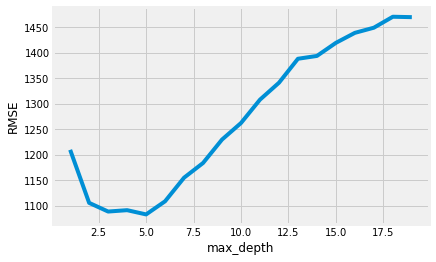

In [65]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, rmse_scores);
plt.xlabel('max_depth')
plt.ylabel('RMSE');

In [66]:
# max_depth=5 was best, so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=5, random_state=1)
treereg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [80]:
# "Gini importance" of each feature: 
#the (normalized) total reduction of error brought by that feature.
pd.DataFrame({'feature': feature_cols,
             'importance': treereg.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
0,CG_SPEND,0.899915
1,LEADS,0.082121
2,CAR2,0.006971
18,WMN6,0.005956
25,Syndication_Air_Type,0.005037
5,GBR6,0.000000
16,TKM6,0.000000
24,Spot_Air_Type,0.000000
23,Satellite_Air_Type,0.000000
22,Regional Cable_Air_Type,0.000000


In [81]:
from sklearn.tree import export_graphviz

export_graphviz(treereg, out_file='tree4.dot', feature_names=feature_cols)

digraph Tree {
node [shape=box] ;
0 [label="CG_SPEND <= 7611.9\nmse = 2399941.842\nsamples = 40457\nvalue = 310.333"] ;
1 [label="CG_SPEND <= 2760.88\nmse = 494992.812\nsamples = 39485\nvalue = 159.825"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="LEADS <= 6.5\nmse = 95474.298\nsamples = 36609\nvalue = 61.862"] ;
1 -> 2 ;
3 [label="CG_SPEND <= 964.89\nmse = 30561.929\nsamples = 33342\nvalue = 24.76"] ;
2 -> 3 ;
4 [label="LEADS <= 2.5\nmse = 3913.133\nsamples = 29432\nvalue = 7.588"] ;
3 -> 4 ;
5 [label="mse = 1535.985\nsamples = 26929\nvalue = 3.493"] ;
4 -> 5 ;
6 [label="mse = 27367.449\nsamples = 2503\nvalue = 51.637"] ;
4 -> 6 ;
7 [label="LEADS <= 3.5\nmse = 212229.136\nsamples = 3910\nvalue = 154.021"] ;
3 -> 7 ;
8 [label="mse = 107220.176\nsamples = 1931\nvalue = 84.3"] ;
7 -> 8 ;
9 [label="mse = 305319.92\nsamples = 1979\nvalue = 222.051"] ;
7 -> 9 ;
10 [label="CG_SPEND <= 2014.725\nmse = 600523.172\nsamples = 3267\nvalue = 440.515"] ;
2 -> 10 ;
11 [label="CG_SPEND <= 1195.725\nmse = 339369.624\nsamples = 2081\nvalue = 323.08"] ;
10 -> 11 ;
12 [label="mse = 113902.279\nsamples = 691\nvalue = 180.183"] ;
11 -> 12 ;
13 [label="mse = 436257.026\nsamples = 1390\nvalue = 394.118"] ;
11 -> 13 ;
14 [label="LEADS <= 11.5\nmse = 992096.291\nsamples = 1186\nvalue = 646.57"] ;
10 -> 14 ;
15 [label="mse = 871938.711\nsamples = 670\nvalue = 528.256"] ;
14 -> 15 ;
16 [label="mse = 1106338.597\nsamples = 516\nvalue = 800.194"] ;
14 -> 16 ;
17 [label="LEADS <= 15.5\nmse = 3903400.381\nsamples = 2876\nvalue = 1406.805"] ;
1 -> 17 ;
18 [label="LEADS <= 7.5\nmse = 2601015.333\nsamples = 1499\nvalue = 847.343"] ;
17 -> 18 ;
19 [label="LEADS <= 3.5\nmse = 1410070.643\nsamples = 433\nvalue = 393.132"] ;
18 -> 19 ;
20 [label="mse = 372624.969\nsamples = 110\nvalue = 98.63"] ;
19 -> 20 ;
21 [label="mse = 1723784.231\nsamples = 323\nvalue = 493.426"] ;
19 -> 21 ;
22 [label="CG_SPEND <= 4819.315\nmse = 2966927.394\nsamples = 1066\nvalue = 1031.839"] ;
18 -> 22 ;
23 [label="mse = 2314814.063\nsamples = 864\nvalue = 922.898"] ;
22 -> 23 ;
24 [label="mse = 5488278.939\nsamples = 202\nvalue = 1497.804"] ;
22 -> 24 ;
25 [label="CG_SPEND <= 4592.115\nmse = 4609526.974\nsamples = 1377\nvalue = 2015.836"] ;
17 -> 25 ;
26 [label="LEADS <= 29.5\nmse = 2888480.207\nsamples = 642\nvalue = 1601.231"] ;
25 -> 26 ;
27 [label="mse = 2873459.951\nsamples = 557\nvalue = 1499.179"] ;
26 -> 27 ;
28 [label="mse = 2471448.486\nsamples = 85\nvalue = 2269.971"] ;
26 -> 28 ;
29 [label="LEADS <= 23.5\nmse = 5831513.406\nsamples = 735\nvalue = 2377.98"] ;
25 -> 29 ;
30 [label="mse = 5964628.873\nsamples = 311\nvalue = 2000.717"] ;
29 -> 30 ;
31 [label="mse = 5552905.388\nsamples = 424\nvalue = 2654.699"] ;
29 -> 31 ;
32 [label="CG_SPEND <= 13019.095\nmse = 41482032.305\nsamples = 972\nvalue = 6424.362"] ;
0 -> 32 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
33 [label="LEADS <= 22.5\nmse = 15963671.781\nsamples = 491\nvalue = 4029.195"] ;
32 -> 33 ;
34 [label="LEADS <= 3.5\nmse = 16171379.919\nsamples = 100\nvalue = 2747.992"] ;
33 -> 34 ;
35 [label="mse = 0.0\nsamples = 9\nvalue = 0.0"] ;
34 -> 35 ;
36 [label="LEADS <= 6.5\nmse = 16950035.41\nsamples = 91\nvalue = 3019.771"] ;
34 -> 36 ;
37 [label="mse = 1252306.467\nsamples = 3\nvalue = 9202.62"] ;
36 -> 37 ;
38 [label="mse = 16137543.306\nsamples = 88\nvalue = 2808.992"] ;
36 -> 38 ;
39 [label="CG_SPEND <= 11349.695\nmse = 15383363.585\nsamples = 391\nvalue = 4356.868"] ;
33 -> 39 ;
40 [label="WMN6 <= 0.5\nmse = 13069195.531\nsamples = 318\nvalue = 4052.547"] ;
39 -> 40 ;
41 [label="mse = 13063604.645\nsamples = 312\nvalue = 3989.168"] ;
40 -> 41 ;
42 [label="mse = 2289408.189\nsamples = 6\nvalue = 7348.247"] ;
40 -> 42 ;
43 [label="LEADS <= 42.5\nmse = 23303420.433\nsamples = 73\nvalue = 5682.541"] ;
39 -> 43 ;
44 [label="mse = 25240805.28\nsamples = 42\nvalue = 4599.142"] ;
43 -> 44 ;
45 [label="mse = 16933797.492\nsamples = 31\nvalue = 7150.373"] ;
43 -> 45 ;
46 [label="CG_SPEND <= 27761.141\nmse = 55696980.11\nsamples = 481\nvalue = 8869.325"] ;
32 -> 46 ;
47 [label="Syndication_Air_Type <= 0.5\nmse = 38089994.239\nsamples = 280\nvalue = 7796.575"] ;
46 -> 47 ;
48 [label="WMN6 <= 0.5\nmse = 37905826.618\nsamples = 271\nvalue = 7977.138"] ;
47 -> 48 ;
49 [label="mse = 36967402.608\nsamples = 265\nvalue = 7830.15"] ;
48 -> 49 ;
50 [label="mse = 36253315.722\nsamples = 6\nvalue = 14469.082"] ;
48 -> 50 ;
51 [label="LEADS <= 31.5\nmse = 13093587.703\nsamples = 9\nvalue = 2359.647"] ;
47 -> 51 ;
52 [label="mse = 0.0\nsamples = 5\nvalue = 0.0"] ;
51 -> 52 ;
53 [label="mse = 13800762.481\nsamples = 4\nvalue = 5309.205"] ;
51 -> 53 ;
54 [label="LEADS <= 88.0\nmse = 76387865.167\nsamples = 201\nvalue = 10363.703"] ;
46 -> 54 ;
55 [label="CAR2 <= 0.5\nmse = 88878828.165\nsamples = 5\nvalue = 26532.544"] ;
54 -> 55 ;
56 [label="mse = 21236474.68\nsamples = 3\nvalue = 19410.453"] ;
55 -> 56 ;
57 [label="mse = 126700.402\nsamples = 2\nvalue = 37215.68"] ;
55 -> 57 ;
58 [label="LEADS <= 154.5\nmse = 69229917.716\nsamples = 196\nvalue = 9951.233"] ;
54 -> 58 ;
59 [label="mse = 80738687.744\nsamples = 79\nvalue = 12354.072"] ;
58 -> 59 ;
60 [label="mse = 54928325.14\nsamples = 117\nvalue = 8328.803"] ;
58 -> 60 ;
}


Populating webgraphviz with this code generates a decision tree

<a id="testing"></a>
## Testing the Model

---
Testing model trained on training data on testing split

In [82]:
y_pred = treereg.predict(X_test)
y_pred

array([   3.49345687,  222.05068216,    3.49345687, ...,    3.49345687,
          3.49345687,  394.11794245])

In [83]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1113.7904327610195

Testing set had a lower rmse than the null model and training set, so this model seems to be working!